In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
import warnings
warnings.filterwarnings('ignore')


In [3]:
train_path='D:\HOPE AI\Chatgpt API Projects\Cooking\Vegetable Images\train'
test_path='D:\HOPE AI\Chatgpt API Projects\Cooking\Vegetable Images\test'
validation_path='D:\HOPE AI\Chatgpt API Projects\Cooking\Vegetable Images\validation'

In [4]:
image_classes = os.listdir('D:\HOPE AI\Chatgpt API Projects\Cooking\Vegetable Images\train')
print(image_classes)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [5]:
def plot_image(image_classes):
    plt.figure(figsize=(14 , 14))
    
    for i , category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image 
        
        img= image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4 , 4 , i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

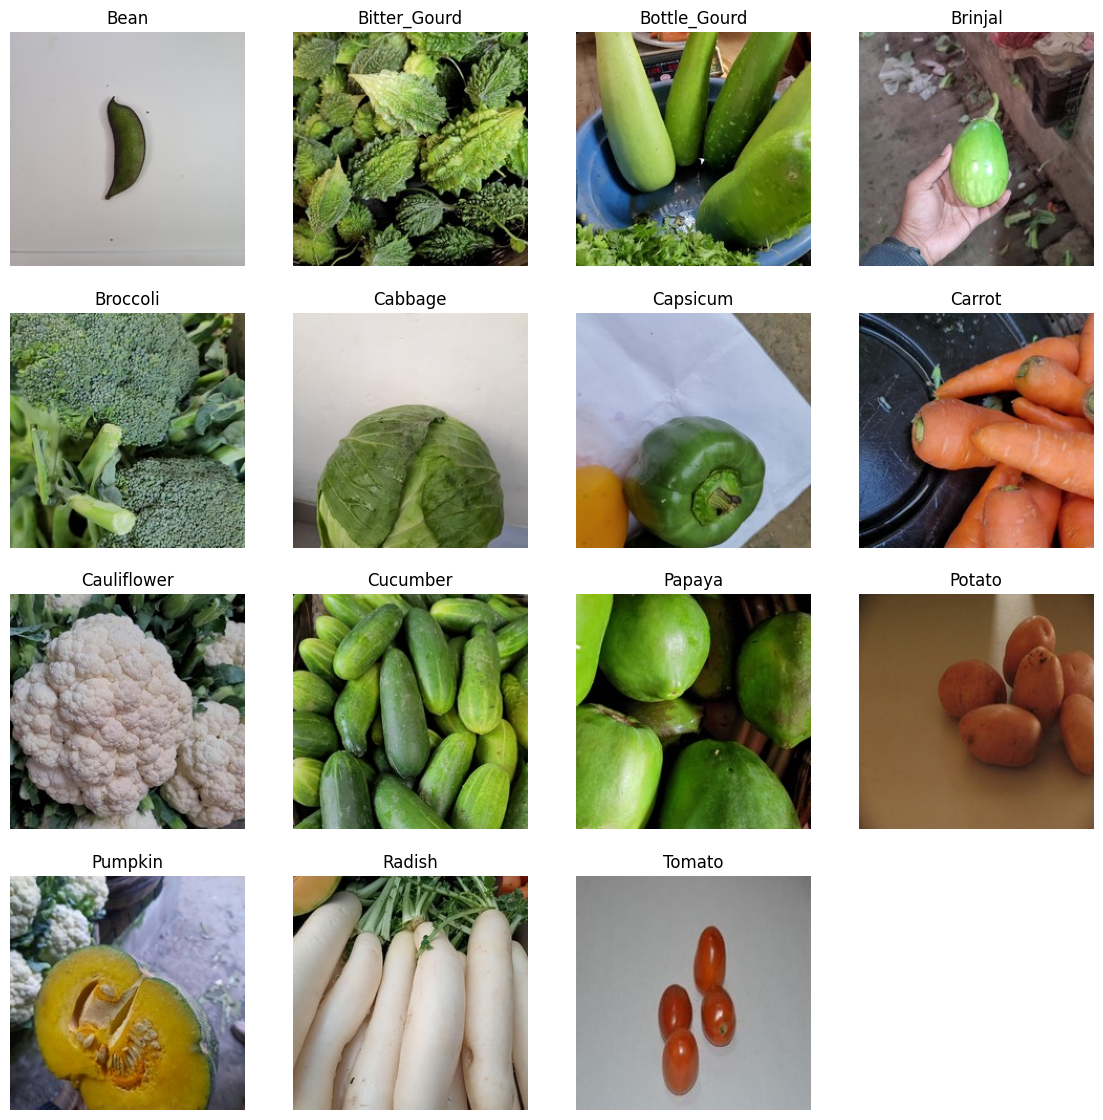

In [6]:
plot_image(image_classes)

In [7]:
data_generator = ImageDataGenerator(rescale=1/255)

In [8]:
train_data = data_generator.flow_from_directory(train_path,
                                               target_size = (150 , 150),
                                               batch_size = 32 , 
                                               class_mode = 'categorical')

Found 15000 images belonging to 15 classes.


In [9]:
test_data = data_generator.flow_from_directory(test_path,
                                              target_size = (150 , 150),
                                              batch_size = 32 , 
                                              class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [10]:
validation_data = data_generator.flow_from_directory(validation_path,
                                                target_size = (150 , 150),
                                              batch_size = 32 , 
                                              class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [11]:
model = Sequential()
#add conv layer
model.add(Conv2D(filters=32 , kernel_size=3 , padding = 'same' ,
                 activation ='relu' , input_shape=[150 , 150 , 3] ))
#add pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))
#add conv layer
model.add(Conv2D(filters=64 , kernel_size=3 , padding = 'same' ,
                 activation ='relu'))
#add pooling layer 
model.add(MaxPooling2D())
#add Flatten 
model.add(Flatten())
#fully connected layer 
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(128 , activation = 'relu'))
#add output layer 
model.add(Dense(15 , activation='softmax'))



In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,214,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,252,815 (42.93 MB)

 Trainable params: 11,252,815 (42.93 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#model Compile 
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
model_history = model.fit(train_data , epochs = 5 ,
                         validation_data = validation_data)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 434s 902ms/step - accuracy: 0.4226 - loss: 1.8542 - val_accuracy: 0.8393 - val_loss: 0.5077
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 323s 688ms/step - accuracy: 0.8858 - loss: 0.3720 - val_accuracy: 0.8667 - val_loss: 0.4276
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 322s 687ms/step - accuracy: 0.9618 - loss: 0.1309 - val_accuracy: 0.9400 - val_loss: 0.2167
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 323s 688ms/step - accuracy: 0.9810 - loss: 0.0609 - val_accuracy: 0.9243 - val_loss: 0.3137
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 312s 666ms/step - accuracy: 0.9834 - loss: 0.0505 - val_accuracy: 0.9417 - val_loss: 0.2417


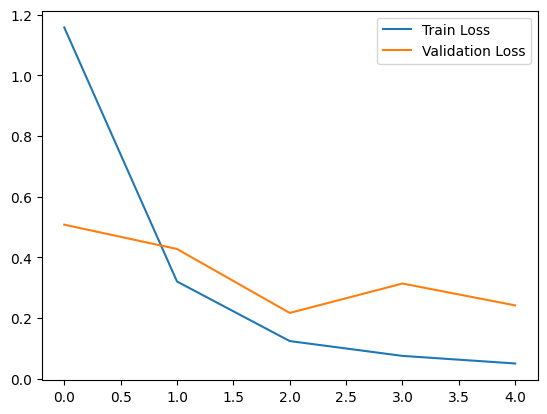

In [15]:
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

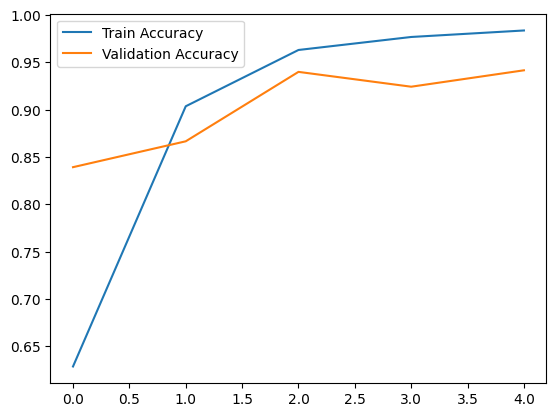

In [16]:
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [17]:
model.evaluate(train_data)

469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 138ms/step - accuracy: 0.9961 - loss: 0.0148


[0.016001714393496513, 0.9958000183105469]

In [18]:
model.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 48s 502ms/step - accuracy: 0.9495 - loss: 0.2126


[0.2137785255908966, 0.9480000138282776]

In [19]:
#Save Model
model.save('Vegetable_model.h5')

In [20]:
model.save('Vegetable_model.keras')  # Native Keras format


In [21]:
model.save('Vegetable_model.h5', save_format='h5')


In [22]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    model.save('Vegetable_model.h5')